### Predicción del precio de una nueva casa a partir de alguna de sus características

Para ello se usa el conjunto de datos de vivienda de Boston de Scikit-learn, que proporciona mediciones registradas
de 13 atributos de los mercados de la vivienda de Boston, así como el precio medio de la vivienda.

**Variables Independientes (Características)**:
- **CRIM**     tasa de delincuencia per cápita por ciudad
- **ZN**       proporción de suelo residencial zonificado para lotes de más de 25.000 pies cuadrados.
- **INDUS**    proporción de acres comerciales no minoristas por ciudad
- **CHAS**     Variable ficticia Charles River (= 1 si el tramo linda con el río; 0 en caso contrario)
- **NOX**      concentración de óxidos nítricos (partes por 10 millones)
- **RM**       número medio de habitaciones por vivienda
- **AGE**      proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- **DIS**      distancias ponderadas a cinco centros de empleo de Boston
- **RAD**      índice de accesibilidad a las autopistas radiales
- **TAX**      tipo del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares
- **PTRATIO**  ratio alumnos-profesor por ciudad
- **B**        1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad
- **LSTAT**    % estatus inferior de la población
- **MEDV**     Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

https://www.geeksforgeeks.org/ml-boston-housing-kaggle-challenge-with-linear-regression/

https://fairlearn.org/main/user_guide/datasets/boston_housing_data.html

https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

https://www.geeksforgeeks.org/boston-dataset-in-sklearn/



In [15]:
import pandas as pd
import seaborn as sns

boston = pd.read_csv("data.csv")
boston = boston.fillna(boston.mean())
X_boston = boston.iloc[:, :-1].values  
y_boston = boston.iloc[:, -1].values
print("Forma de los datos:", X_boston.shape, y_boston.shape)

print(f"Número total de muestras: {boston.shape[0]}")
feature_names = boston.columns[:-1].tolist()
print(f"Número de características: {boston.shape[1] - 1}") 
print("Características:", feature_names)

df_boston = pd.DataFrame(X_boston, columns=feature_names)
df_boston["price"] = y_boston


Forma de los datos: (506, 13) (506,)
Número total de muestras: 506
Número de características: 13
Características: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


El método `head()` en pandas muestra las primeras filas de un DataFrame (por defecto 5 filas), permitiendo examinar rápidamente la estructura y contenido de los datos antes de realizar análisis más detallados.

In [2]:
print(df_boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B      LSTAT  price  
0     15.3  396.90   4.980000   24.0  
1     17.8  396.90   9.140000   21.6  
2     17.8  392.83   4.030000   34.7  
3     18.7  394.63   2.940000   33.4  
4     18.7  396.90  12.715432   36.2  


Resumen estadístico descriptivo de las características de un DataFrame:
- count: número de valores no nulos
- mean: valor medio de cada columna
- std: desviación estándar
- min: valor mínimo
- Percentiles
    - 25%
    - Mediana (50%)
    - 75%
- max: valor máximo

In [3]:
print(boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.545770   22.921051    6.699165    0.250233    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.083235    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.290250    0.000000    9.900000    0.000000    0.538000    6.208500   
75%      3.611874   11.211934   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.439466    2.1057

El método `info()` muestra la estructura y la composición de un DataFrame:

- El tipo de índice y los tipos de datos de cada columna
- El número de valores no nulos en cada columna
- El uso de memoria del DataFrame
- El número total de entradas

In [4]:
print(boston.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


En primer lugar, consideramos la tarea de predecir el valor medio de la vivienda en el área de Boston utilizando como variable uno de los atributos, por ejemplo, *LSTAT*, definido como la *"proporción de  personas de estatus más bajo en la población"*.

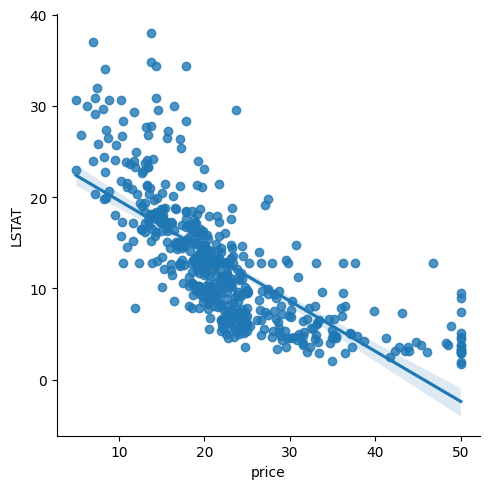

In [5]:
sns.lmplot(data = df_boston, x = "price", y = "LSTAT",  order = 1)

Se puede observar ver claramente que la relación entre el precio y LSTAT es no lineal, ya que la línea recta ofrece un ajuste pobre.

Se puede probar fácilmente si se puede obtener un mejor ajuste
puede obtenerse incluyendo términos de orden superior. Por ejemplo, un modelo cuadrático ($order = 2$):

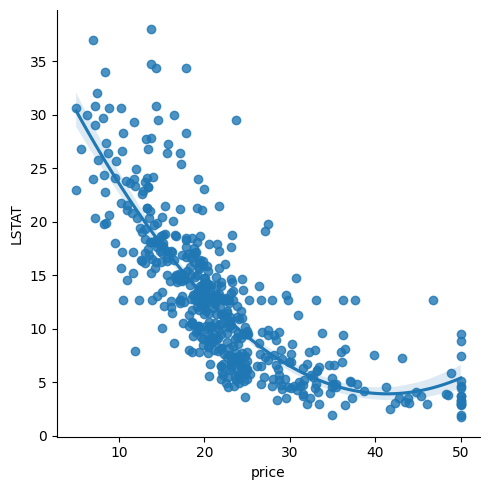

In [6]:
sns.lmplot(data = df_boston, x = "price", y = "LSTAT",  order = 2)

Podemos estudiar la relación entre varias variables de un conjunto de datos mediante
utilizando las funciones **corr** y **heatmap** que permiten calcular una matriz de correlación
para un conjunto de datos y dibujar un mapa de calor con los valores de correlación.

El mapa de calor
es una imagen matricial que ayuda a interpretar las correlaciones entre las variables.

<Axes: >

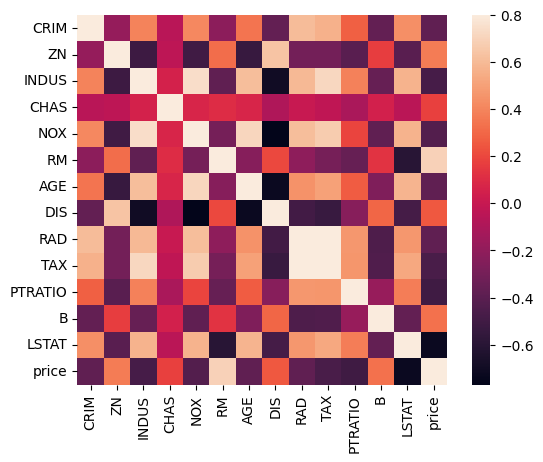

In [7]:
corrmat = df_boston.corr()
sns.heatmap( corrmat , vmax = .8, square = True)

Podemos seleccionar aquellas variables más correlacionadas con el precio o las que consideremos más interesantes.

<Axes: >

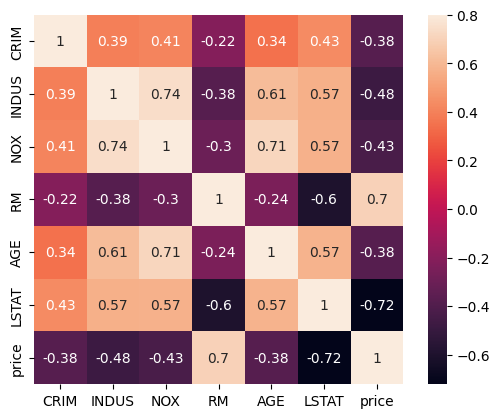

In [8]:
df_boston_red = df_boston[["CRIM", "INDUS", "NOX", "RM", "AGE", "LSTAT", "price"]]
corrmat_red = df_boston_red.corr()
sns.heatmap( corrmat_red , vmax = .8, square = True, annot=True)

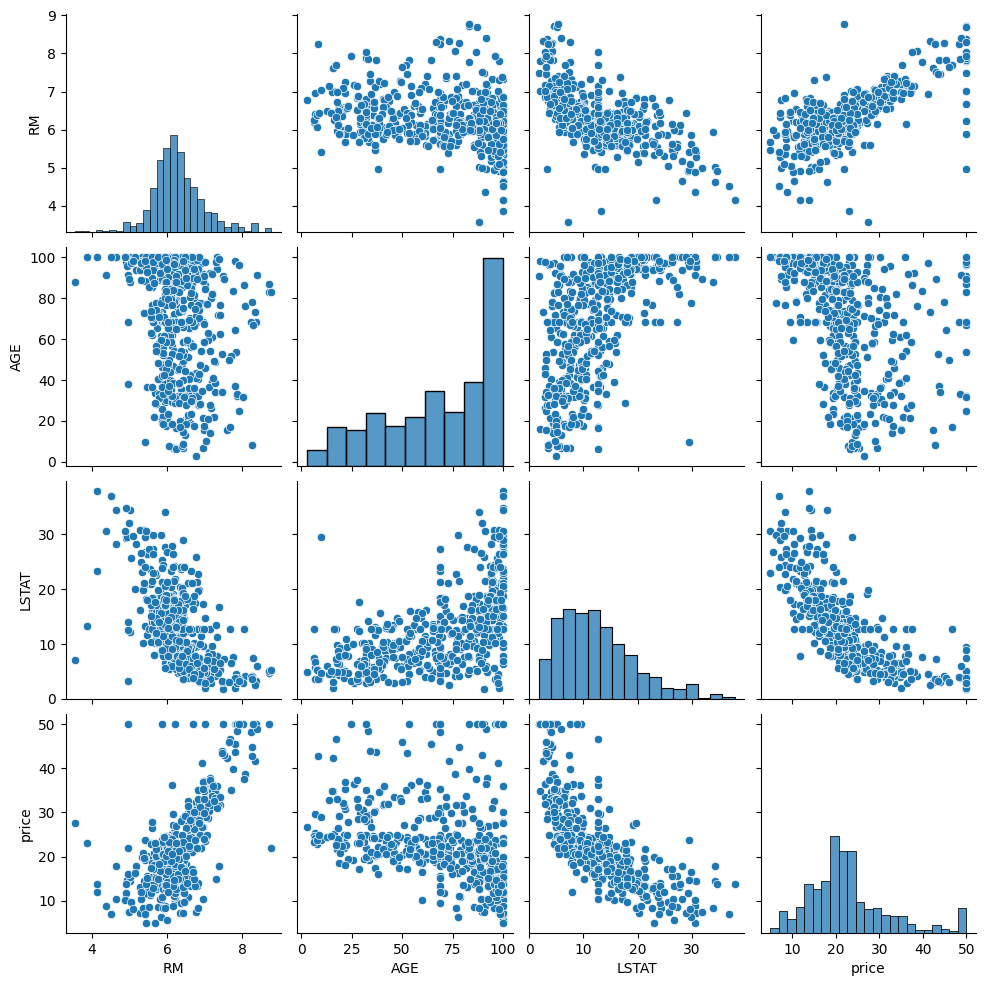

In [9]:
sns.pairplot(df_boston_red[["RM", "AGE", "LSTAT", "price"]])

Para evaluar el poder de predicción del modelo con nuevas muestras:

1. dividimos en conjunto de entrenamiento y test.



In [10]:
train_size = int(X_boston.shape[0]/2)
X_train = X_boston [:train_size]
X_test = X_boston [train_size:]
y_train = y_boston [:train_size]
y_test = y_boston [train_size:]
print ("Tamaños de los conjuntos de entrenamiento y prueba",X_train.shape , X_test.shape)

Tamaños de los conjuntos de entrenamiento y prueba (253, 13) (253, 13)


2. calculamos los coeficientes de la regresión lineal

In [11]:
from sklearn. linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train , y_train)


LinearRegression()

In [12]:
print ("Coeff e intercepción:", regr.coef_ , regr.intercept_)


Coeff e intercepción: [ 3.08323848e-01  2.92025800e-02 -7.49688624e-03  2.43979707e-01
 -4.48991380e+00  8.86331362e+00 -4.51891943e-02 -1.12138306e+00
  2.18956154e-01 -1.55484348e-02 -6.71249758e-01  1.52126178e-02
 -1.09879279e-01] -10.768945010818623


3. ejecutamos la predicción sobre los datos de test

In [17]:
y_pred = regr.predict(X_test)


4. evaluamos el modelo mediante el uso del coeficiente $R^2$. También podemos calcular también el **MSE**.

In [18]:
from sklearn import metrics
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))
print ("var:", y_pred.var(), y_test.var())

MSE: 74.23471342859878
R^2: -0.03317853785333513
var: 71.85080865388318 93.28670311987378


Podemos ver que todos los coeficientes obtenidos son diferentes de cero, lo que significa que no se descarta ninguna variable.

A continuación, intentamos construir un modelo disperso para predecir el precio utilizando los factores más importantes y descartando los no informativos. Para ello
podemos crear un regresor **Lasso**, forzando los coeficientes cero.

In [22]:
from sklearn.linear_model import Lasso

regr_lasso = Lasso(alpha=.3)
regr_lasso.fit(X_train, y_train)
y_pred = regr_lasso.predict(X_test)
print("MSE:", metrics.mean_squared_error(y_pred, y_test))
print("R^2:", metrics.r2_score(y_pred, y_test))
print("var:", y_pred.var(), y_test.var())


MSE: 46.32934367149176
R^2: 0.46694893414623173
var: 86.91351849618341 93.28670311987378


In [23]:
print ("Coeff e intercepción:", regr_lasso.coef_ , regr_lasso.intercept_)

Coeff e intercepción: [ 0.          0.02595386 -0.01389838  0.         -0.          7.76756334
 -0.03547707 -0.85128804  0.10354    -0.0147757  -0.64670878  0.01562934
 -0.20804178] -6.813685637282962


De aquí podemos obtener una serie de variables y su relativa contribución a la predicción.

In [24]:
import numpy as np
ind = np.argsort(np.abs(regr_lasso.coef_))
print("Variables ordenadas (de menor a mayor importancia):")
print(np.array(feature_names)[ind])

Variables ordenadas (de menor a mayor importancia):
['CRIM' 'CHAS' 'NOX' 'INDUS' 'TAX' 'B' 'ZN' 'AGE' 'RAD' 'LSTAT' 'PTRATIO'
 'DIS' 'RM']


Para evaluar la predicción, podría ser interesante visualizar las respuestas objetivo
y las respuestas predichas en un gráfico de dispersión, como se hace en el siguiente código:

Text(0, 0.5, 'Precio previsto ($1000s)')

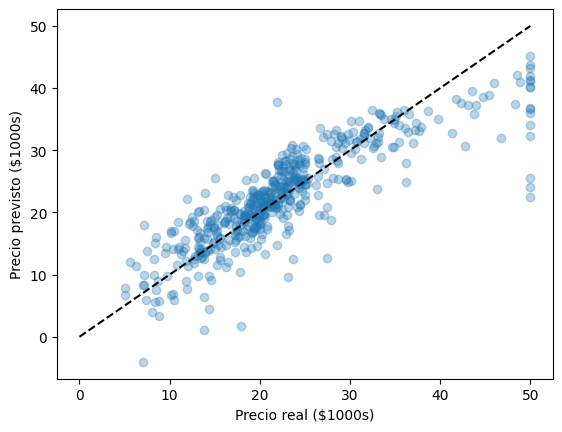

In [25]:
clf = LinearRegression()
clf.fit(X_boston, y_boston)
predicted = clf.predict(X_boston)

import matplotlib.pyplot as plt

plt.scatter(y_boston, predicted, alpha=0.3)
plt.plot([0, 50], [0, 50], "--k")
plt.axis("tight")
plt.xlabel("Precio real ($1000s)")
plt.ylabel("Precio previsto ($1000s)")

También hay otras estrategias para la selección de características. Por ejemplo, podemos seleccionar
las $k=5$ mejores características, según las $k$ puntuaciones más altas, utilizando la función
$SelectKBest$ de Scikit-learn:

In [26]:
import sklearn.feature_selection as fs
selector = fs.SelectKBest(score_func=fs.f_regression, k=5)
X_best = selector.fit_transform(X_train, y_train)
selector.fit(X_train, y_train)
selected_features = [feature for feature, selected in zip(feature_names, selector.get_support()) if selected]
print("Características seleccionadas:", selected_features)
print("Características seleccionadas (método alternativo):", np.array(feature_names)[selector.get_support(indices=True)].tolist())

Características seleccionadas: ['INDUS', 'RM', 'AGE', 'PTRATIO', 'LSTAT']
Características seleccionadas (método alternativo): ['INDUS', 'RM', 'AGE', 'PTRATIO', 'LSTAT']


In [54]:
np.array(feature_names)[selector.get_support(indices=True)].tolist()

['INDUS', 'RM', 'AGE', 'PTRATIO', 'LSTAT']